## EDA for my own spoitfy data
1. Authenicate 
2. annalyze my saved music, get the parameter pattern

In [2]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from flask import Flask, request, session, redirect, url_for
import time
import os
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from dotenv import load_dotenv

In [52]:
load_dotenv()
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
REDIRECT_URI = os.getenv("REDIRECT_URI")
client_credintials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

In [54]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI), client_credentials_manager=client_credintials_manager)


In [49]:

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])
    print(track['uri'])
    print(track['artists'][0]['uri'])
    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    print("artist genres:", artist["genres"])

    album = sp.album(track["album"]["external_urls"]["spotify"])
    print("album genres:", album["genres"])
    print("album release-date:", album["release_date"])

0 Yeah Yeah Yeahs  –  Burning
spotify:track:4JFet0crxTPHFV2n1ZqZKV
spotify:artist:3TNt4aUIxgfy9aoaft5Jj2
artist genres: ['alternative dance', 'alternative rock', 'art pop', 'dance-punk', 'garage rock', 'indie rock', 'modern rock', 'neo-synthpop', 'new rave']
album genres: []
album release-date: 2022-09-30
1 Mitski  –  The Frost
spotify:track:41nIJErYY9goKvnCyG7ov6
spotify:artist:2uYWxilOVlUdk4oV9DvwqK
artist genres: ['brooklyn indie', 'pov: indie']
album genres: []
album release-date: 2023-09-15
2 Soul For Real  –  Every Little Thing I Do
spotify:track:5u3rsmRYRSKJpFHXPT4p07
spotify:artist:296LotOmbj7eOX7r9l46fK
artist genres: ['boy band', 'contemporary r&b', 'new jack swing', 'r&b']
album genres: []
album release-date: 1995
3 Kiyotaka Sugiyama  –  君のハートはマリンブルー
spotify:track:04d2ceRCfAaBwuQfG1WwMK
spotify:artist:5Zc8dRhik5WK1nxjzcqwfC
artist genres: ['classic city pop']
album genres: []
album release-date: 2019-01-30
4 Um Junghwa  –  Invitation
spotify:track:61O7Yh3Sj9N8Euk1HZVb05
spot

## 1. according to your saved songs to generate recommendations

In [61]:

def get_track_uris(max_tracks):
    '''
    return:
        - track uris
        - track names
        - artist uris
        - artist names
        - artist genres
    
    '''
    track_dfs = pd.DataFrame()
    track_df = pd.DataFrame()
    # get user saved tracks
    for i in range(0, max_tracks, 50):
        results = sp.current_user_saved_tracks(limit=50, offset=i)
        for idx, item in enumerate(results['items']):
            track = item['track']
            print(idx, track['artists'][0]['name'], " – ", track['name'])
            track_df['track_name'] = track['name']
            print(track['uri'])
            track_df['track_uri'] = track['uri']
            artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
            print("artist genres:", artist["genres"])
            track_df['artist_name'] = track['artists'][0]['name']
            track_df['artist_genres'] = [artist["genres"]]
            track_df['artist_uri'] = track['artists'][0]['uri']
            track_dfs = pd.concat([track_dfs, track_df])
        print("track_dfs", track_dfs)
        time.sleep(60)


    track_dfs.to_csv('track_df.csv', index=False)
    return track_dfs

In [62]:
track_dfs = get_track_uris(1000)

0 Yeah Yeah Yeahs  –  Burning
spotify:track:4JFet0crxTPHFV2n1ZqZKV
artist genres: ['alternative dance', 'alternative rock', 'art pop', 'dance-punk', 'garage rock', 'indie rock', 'modern rock', 'neo-synthpop', 'new rave']
1 Mitski  –  The Frost
spotify:track:41nIJErYY9goKvnCyG7ov6
artist genres: ['brooklyn indie', 'pov: indie']
2 Soul For Real  –  Every Little Thing I Do
spotify:track:5u3rsmRYRSKJpFHXPT4p07
artist genres: ['boy band', 'contemporary r&b', 'new jack swing', 'r&b']
3 Kiyotaka Sugiyama  –  君のハートはマリンブルー
spotify:track:04d2ceRCfAaBwuQfG1WwMK
artist genres: ['classic city pop']
4 Um Junghwa  –  Invitation
spotify:track:61O7Yh3Sj9N8Euk1HZVb05
artist genres: []
5 Ariana Grande  –  Daydreamin'
spotify:track:2tQew7pG4IhgNGplOSNIj7
artist genres: ['pop']
6 Tobi Perriáe  –  peace of mind
spotify:track:2juS8J7fPSChwiiUvhI85y
artist genres: []
7 NewJeans  –  Ditto
spotify:track:3r8RuvgbX9s7ammBn07D3W
artist genres: ['k-pop', 'k-pop girl group']
8 CARRTOONS  –  Groceries
spotify:track:5

,track_name,track_uri,artist_name,artist_genres,artist_uri
0,NaN,NaN,NaN,"[alternative dance, alternative rock, art pop,...",spotify:artist:3TNt4aUIxgfy9aoaft5Jj2
0,The Frost,spotify:track:41nIJErYY9goKvnCyG7ov6,Mitski,"[brooklyn indie, pov: indie]",spotify:artist:2uYWxilOVlUdk4oV9DvwqK
0,Every Little Thing I Do,spotify:track:5u3rsmRYRSKJpFHXPT4p07,Soul For Real,"[boy band, contemporary r&b, new jack swing, r&b]",spotify:artist:296LotOmbj7eOX7r9l46fK
0,君のハートはマリンブルー,spotify:track:04d2ceRCfAaBwuQfG1WwMK,Kiyotaka Sugiyama,[classic city pop],spotify:artist:5Zc8dRhik5WK1nxjzcqwfC
0,Invitation,spotify:track:61O7Yh3Sj9N8Euk1HZVb05,Um Junghwa,[],spotify:artist:5v7oyChb49D5Z9mkkXxuVY
...,...,...,...,...,...
0,False Attraction - Original Mix,spotify:track:4TcOD4k6Pq6vGNoZH27AUg,Nina Kraviz,"[electra, minimal techno, russian electronic, ...",spotify:artist:1oZmFNkGAT93yD1xX4vTRE
0,Best Friend - Original Mix,spotify:track:4cqkdH5ng1i5FZdyyqYbwy,Nina Kraviz,"[electra, minimal techno, russian electronic, ...",spotify:artist:1oZmFNkGAT93yD1xX4vTRE
0,Petr - Original Mix,spotify:track:6bcE7wr1bpI3oLKxDlI00v,Nina Kraviz,"[electra, minimal techno, russian electronic, ...",spotify:artist:1oZmFNkGAT93yD1xX4vTRE
0,Ghetto Kraviz - Original Mix,spotify:track:6pGs4VS6BV0WnooovrrxRj,Nina Kraviz,"[electra, minimal techno, russian electronic, ...",spotify:artist:1oZmFNkGAT93yD1xX4vTRE


In [64]:
import pandas as pd

def splitlist(lst, size):
    return [lst[i:i+size] for i in range(0, len(lst), size)]
# print the chunks

def get_audio_feature(track_uris):
    features = []
    r = splitlist(track_uris, 50)
    print(r)
    for pack in range(len(r)):
        print(sp.audio_features(r[pack]))
        features = features + (sp.audio_features(r[pack]))
    df = pd.DataFrame.from_dict(features)
    df['uris'] = track_uris
    return df

In [65]:
track_dfs = pd.read_csv('track_df.csv')
audio_feature_df = get_audio_feature(track_dfs['track_uri'])
df = pd.concat([track_dfs, audio_feature_df], axis=1)
df.to_csv('df.csv', index=False)
print(df)

[0     spotify:track:4JFet0crxTPHFV2n1ZqZKV
1     spotify:track:41nIJErYY9goKvnCyG7ov6
2     spotify:track:5u3rsmRYRSKJpFHXPT4p07
3     spotify:track:04d2ceRCfAaBwuQfG1WwMK
4     spotify:track:61O7Yh3Sj9N8Euk1HZVb05
5     spotify:track:2tQew7pG4IhgNGplOSNIj7
6     spotify:track:2juS8J7fPSChwiiUvhI85y
7     spotify:track:3r8RuvgbX9s7ammBn07D3W
8     spotify:track:5KXNgbRYbqwEFIFM0AMakg
9     spotify:track:6FXqJmgSKka0NRlrxfhSrv
10    spotify:track:1xwTt7QJn3fCQldUbX0flF
11    spotify:track:0lvOUYM0NzbzOI856TUHMM
12    spotify:track:3jxoRPeed8f84PLTuKJeR7
13    spotify:track:7N3wyYCiyIEMsFdaL9BcRF
14    spotify:track:4dWltT1kwOojQQyZJMs5tw
15    spotify:track:6Dk5fHTvH897XrVzCO64Mx
16    spotify:track:5wyau6dzDldoBsya9pwQ8v
17    spotify:track:4dKa5ZzlGqUy3Wo0yaXKNI
18    spotify:track:4htHe9CbVRTYlzjdM09rE7
19    spotify:track:4nMfyBAZvYoSFYt6UfOvZt
20    spotify:track:2oap3QptGISyIvwKpnJJId
21    spotify:track:7pMJ455NDmDtnAxSRniJt2
22    spotify:track:6537jhwnXegjdXhLqorbjE
23    spot

### 1.1 EDA

In [5]:
df = pd.read_csv('df.csv')

pop               155
indietronica       78
art pop            73
r&b                64
indie rock         53
                 ... 
gypsy jazz          1
chilean indie       1
norwegian jazz      1
broken beat         1
electro jazz        1
Length: 536, dtype: int64
pop                     155
indietronica             78
art pop                  73
r&b                      64
indie rock               53
dance pop                51
rock                     46
downtempo                38
metropopolis             35
indie pop                35
dream pop                34
canadian pop             34
modern rock              33
electronica              32
classical                31
minimal techno           30
neo-synthpop             28
pov: indie               28
indie soul               28
chamber pop              28
singer-songwriter        26
electropop               26
soft rock                24
alternative hip hop      24
mellow gold              22
brooklyn indie           22
baro

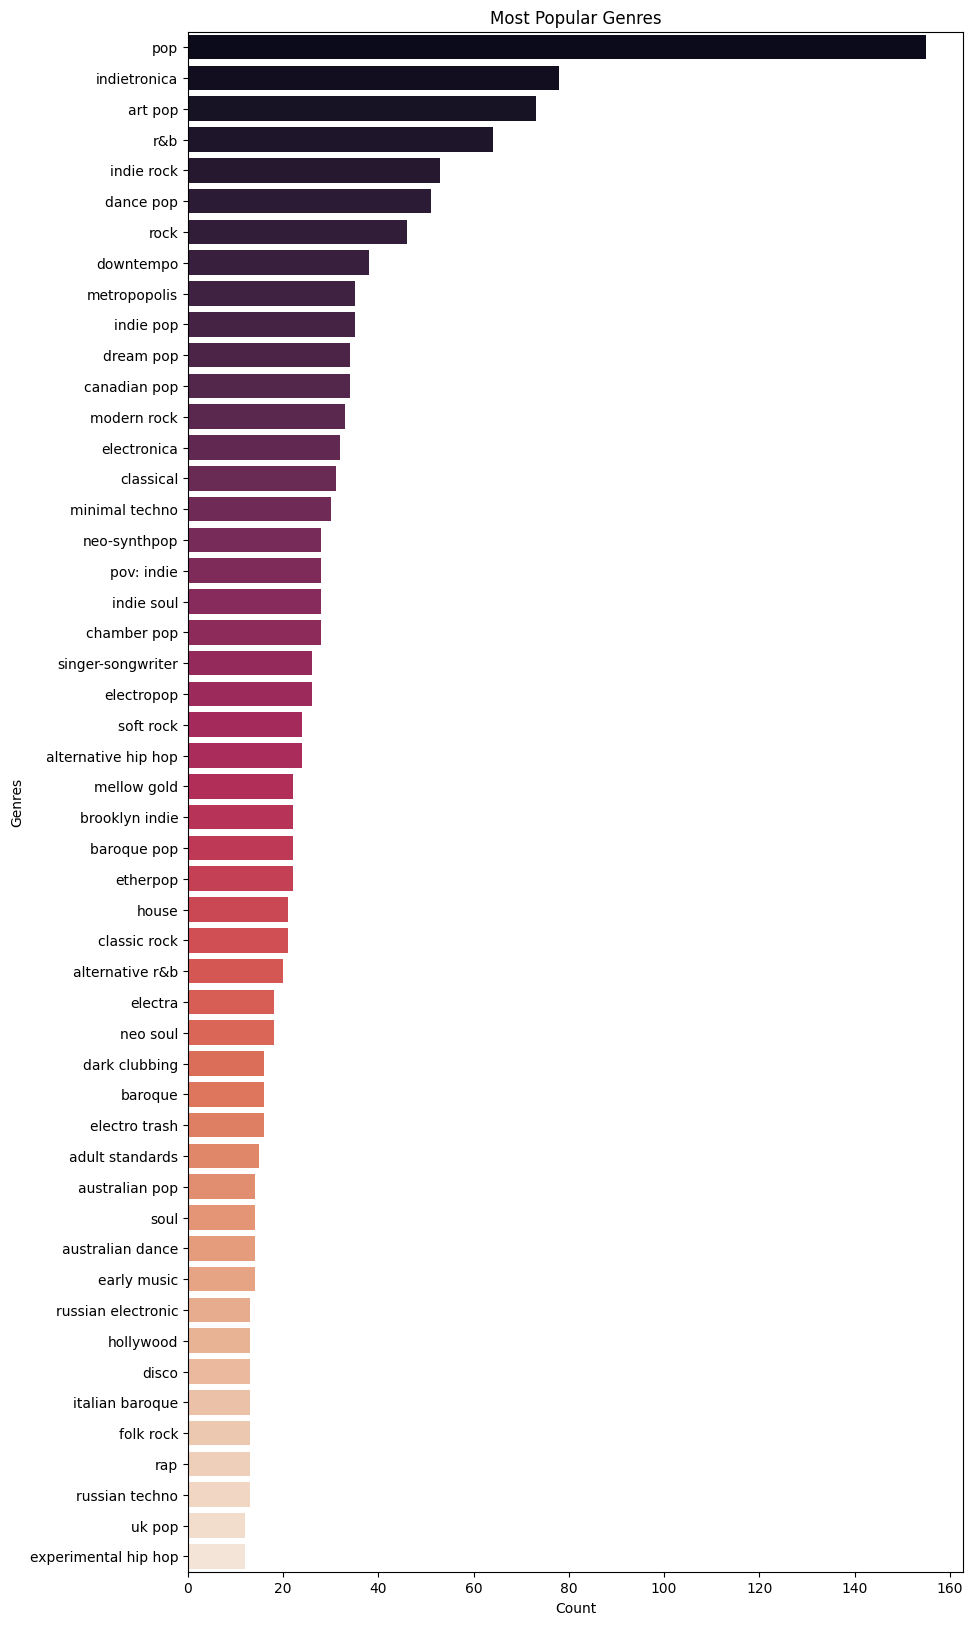

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# plot most popular genres
def plot_most_popular_genres(df):
    genres = []
    for i in range(len(df)):
        genre = ast.literal_eval(df['artist_genres'][i])
        genres += genre
        # genres = [item for sublist in df['artist_genres'][i].split(', ') for item in sublist]
    # genres = [i for sub_i in genres for i in sub_i]
    genres = pd.Series(genres)
    print(genres.value_counts())
    
    # get top 50 genres
    top_genres = genres.value_counts()[:50]
    print(top_genres)
    plt.figure(figsize=(10, 20))

    sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
    plt.title('Most Popular Genres')
    plt.xlabel('Count')
    plt.ylabel('Genres')
    plt.show()
plot_most_popular_genres(df)

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


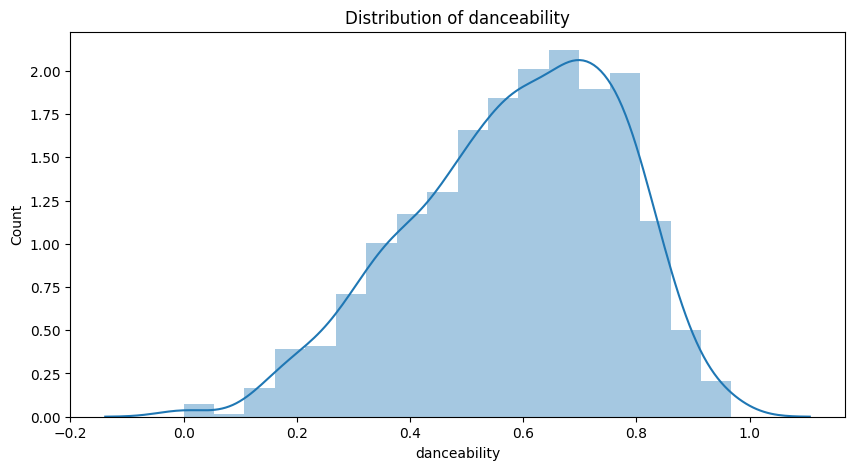

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


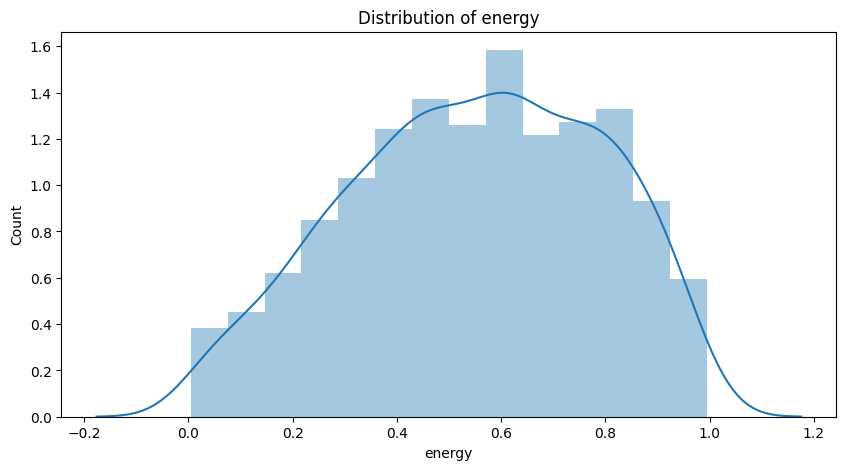

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


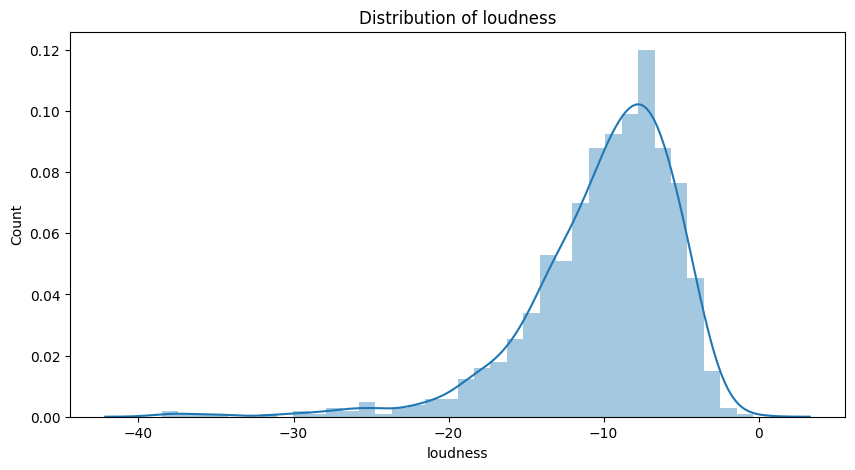

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


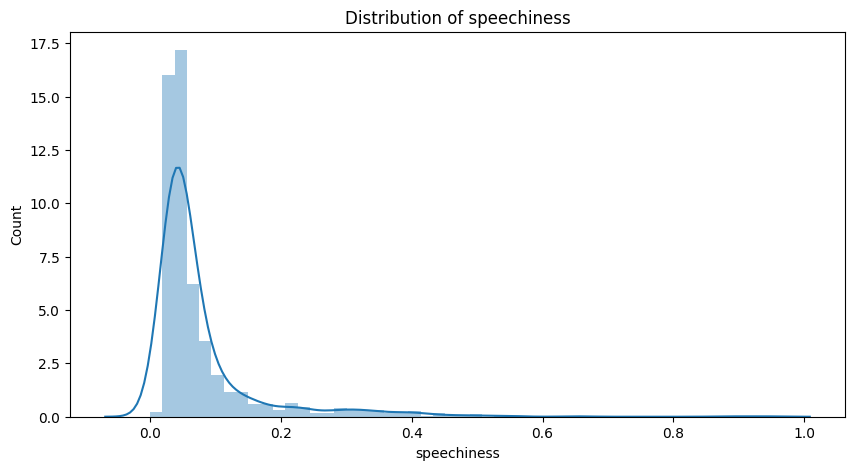

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


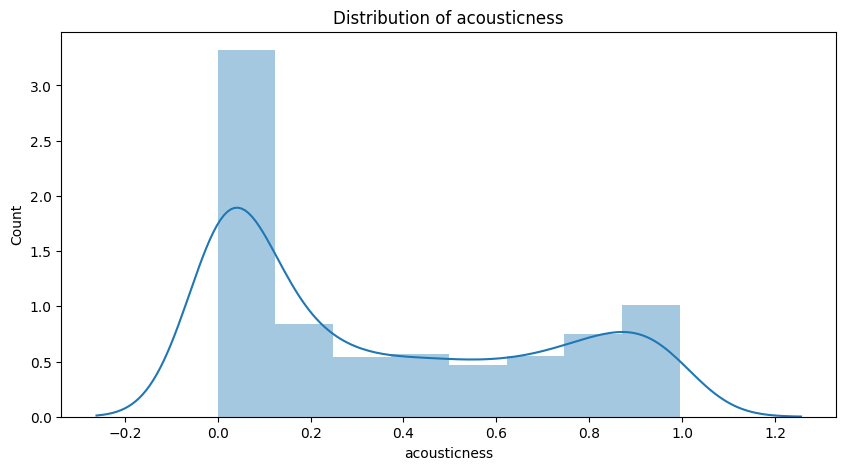

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


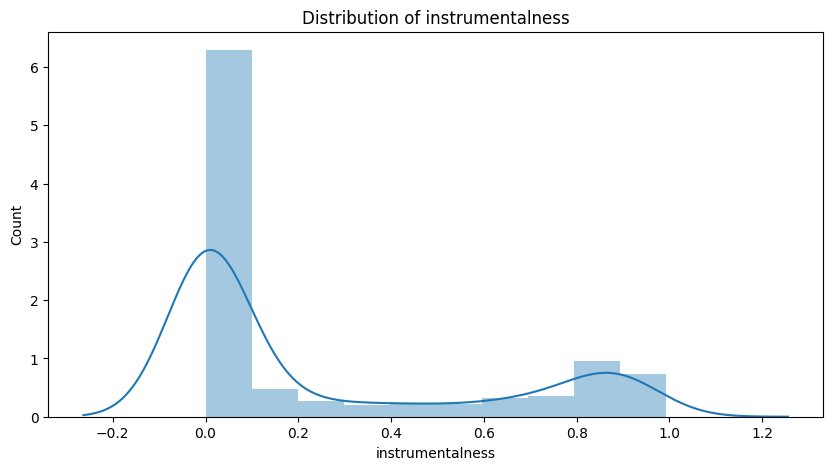

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


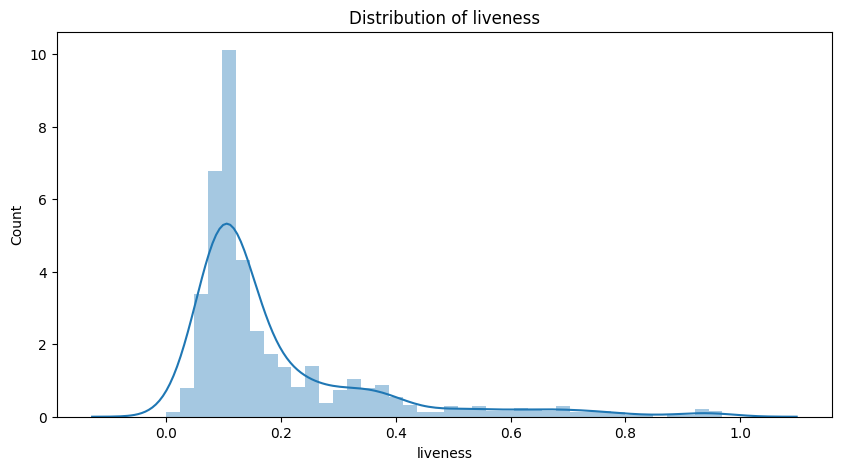

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


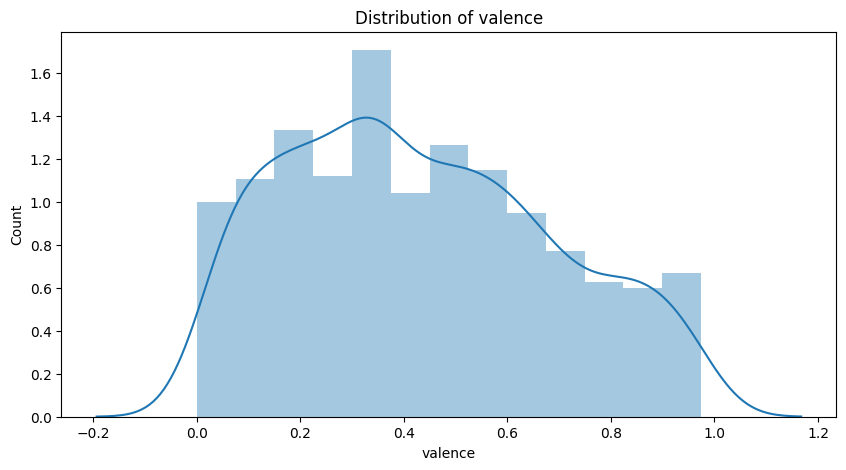

/var/folders/vc/ffcrl3k11vqcv72bwdbfqxlh0000gp/T/ipykernel_12657/3739813447.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


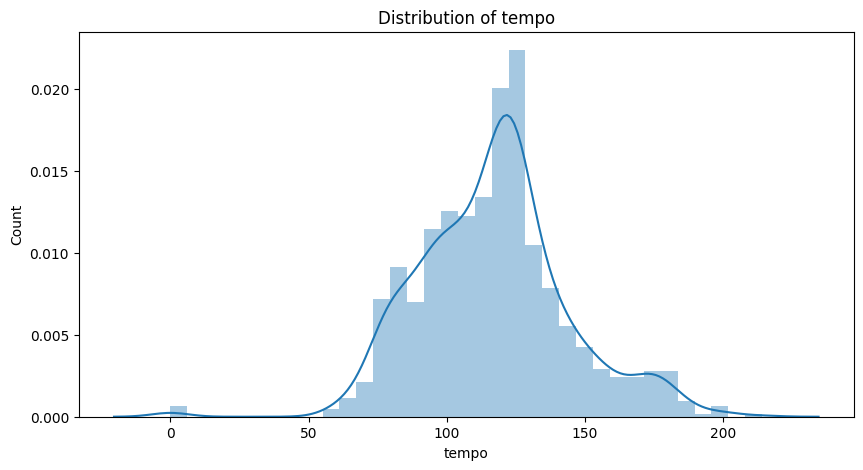

In [8]:
# get the distribution of audio features
def plot_audio_features(df):
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo']
    for feature in audio_features:
        plt.figure(figsize=(10, 5))
        sns.distplot(df[feature])
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
        plt.show()
plot_audio_features(df)

In [ ]:
# get the min and max of the most intense distribution of audio features, and return into a list




In [46]:
import ast
def get_top_picks(feature, df):
    res = []
    for i in range(len(df)):
        res += ast.literal_eval(df[feature][i])
    res = pd.Series(res)
    top_picks = res.value_counts()[:5]
    return top_picks.index

In [37]:
def get_top_uris(feature, df):
    res = []
    for i in range(len(df)):
        res += df[feature][i]
    res = pd.Series(res)
    top_picks = res.value_counts()[:5]
    return top_picks.index

In [59]:
#get recommendations based on top 5 genres, top 5 user saved tracks and audio features, then return top 50 recoomendations and generate a playlist in spotify
def get_recommendations(df):
    # get top genres
    top_genres = get_top_picks('artist_genres', df).tolist()
    # print(top_genres)
    # get rancom tracks from your saved tracks
    random_tracks = df['track_uri'].sample(n=5).tolist()
    # print(random_tracks)
    # get random artists from your saved tracks
    rancom_artisis = df['artist_uri'].sample(n=5).tolist()
    # print(rancom_artisis)
    # get top audio features
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo']
    top_audio_features = pd.DataFrame()
    for feature in audio_features:
        top_audio_features.loc[0, feature] = df[feature].mean()
    # print(top_audio_features)
    # get recommendations
    print(sp.recommendation_genre_seeds())
    recommendations = sp.recommendations(seed_artists=rancom_artisis, seed_genres=top_genres, seed_tracks=random_tracks, limit=30, 
                                         target_danceability=top_audio_features['danceability'], target_energy=top_audio_features['energy'], 
                                         target_loudness=top_audio_features['loudness'], target_speechiness=top_audio_features['speechiness'], 
                                         target_acousticness=top_audio_features['acousticness'], target_instrumentalness=top_audio_features['instrumentalness'], 
                                         target_liveness=top_audio_features['liveness'], target_valence=top_audio_features['valence'], target_tempo=top_audio_features['tempo'])
    # create a playlist
    playlist = sp.user_playlist_create('ggemeny', name='recoomendation', public=True, description='Recoomendations based on your saved tracks')
    # add tracks to the playlist
    track_uris = []
    for track in recommendations['tracks']:
        track_uris.append(track['uri'])
    sp.playlist_add_items(playlist['id'], track_uris)
    return recommendations

In [ ]:
get_recommendations(df)

### 2. According some playlists to generate recommendations

In [12]:
def get_playlist_tracks(username, playlist_id):
    track_lists = []
    results = sp.user_playlist(username, playlist_id, fields='tracks,next')
    tracks = results['tracks']
    while tracks:
        track_lists += [item['track'] for (i, item) in enumerate(tracks['items'])]
        tracks = sp.next(tracks)
    return track_lists

def get_playlist_uris(username, playlist_id):
    return [track['uri'] for track in get_playlist_tracks(username, playlist_id)]